In [52]:
#TJ import needed packages
import astropy
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
objs = Table.read("struc.fits")  #TJ load dataset and assign variables to RA, Dec, and Extinction arrays
RA = objs["RA"]
Dec = objs["DEC"]
extinction = objs["EXTINCTION"]


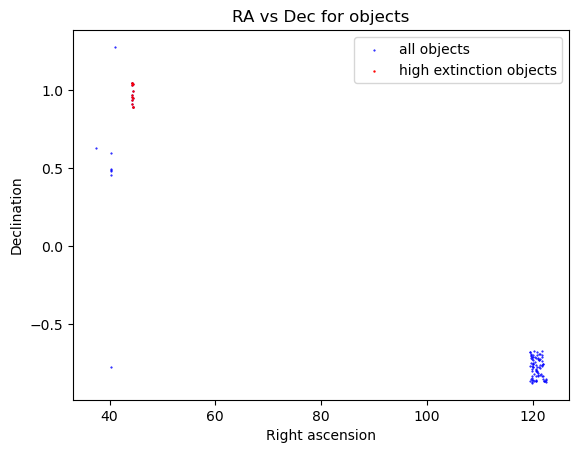

In [32]:
#Python Task #1: Plot RA vs Dec of all objects in file
#Python Task #3 Overplot values where extinction[0] is larger than 0.22

plt.scatter(RA,Dec, s = 0.25, color = 'blue', label = 'all objects') #TJ scatter plot declination vs right ascension, small points so cluster to the right is nicer
mask = extinction[:,0]>0.22 #TJ create a mask that only selects extinction values over 0.22 in the first column
#TJ plot those high extinction objects in red and make them a bit larger
plt.scatter(RA[mask], Dec[mask], s = 0.5, color = 'red', label = 'high extinction objects') 
plt.title('RA vs Dec for objects')
plt.xlabel("Right ascension")
plt.ylabel("Declination")
plt.legend()
plt.show()

In [63]:
#Python Task #4 Generate array of random values

#TJ initialize arrays
array1 = []
array2 = []
array3 = []
for i in range(0,100):
    #TJ append arrays with 100 random numbers between 0-100
    array1.append(np.random.randint(0,100))
    array2.append(np.random.randint(0,100))
    array3.append(np.random.randint(0,100))
array1 = np.array(array1) #TJ convert arrays into numpy arrays for better manipulation
array2 = np.array(array2)
array3 = np.array(array3)

random_numbers = np.column_stack((array1,array2,array3)) #reshape these into a single 3-column array

datatypes = [('RA', 'f8'), ('DEC', 'f8'), ('randomnum', 'f8', (3,))] #TJ define datatypes for each column in recarray

rec_array = np.zeros(100, dtype=datatypes) #TJ initialize array with datatypes defined
rec_array["RA"] = RA #TJ overwrite RA column that was just zeros to be the actual RA data
rec_array["DEC"] = Dec #TJ overwrite DEC column
rec_array["randomnum"] = random_numbers #TJ overwrite randomnum column


fits_file = fits.BinTableHDU(rec_array) #TJ turn this array into a fits file
fits_file.writeto('MyVeryOwnFitsFile.fits', overwrite=True) #TJ save this fits file as MyVeryOwnFitsFile.fits